### Задание 1.

Загрузка данных из CSV и первичная обработка. Загрузите файл ******.csv, содержащий информацию об автомобилях.

- Откройте файл и выведите первые 10 строк.
- Постройте гистограммы для визуализации распределения каждого признака.
- Постройте матрицу корреляции признаков, проанализируйте зависимость признаков друг

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Auto (1).csv')
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


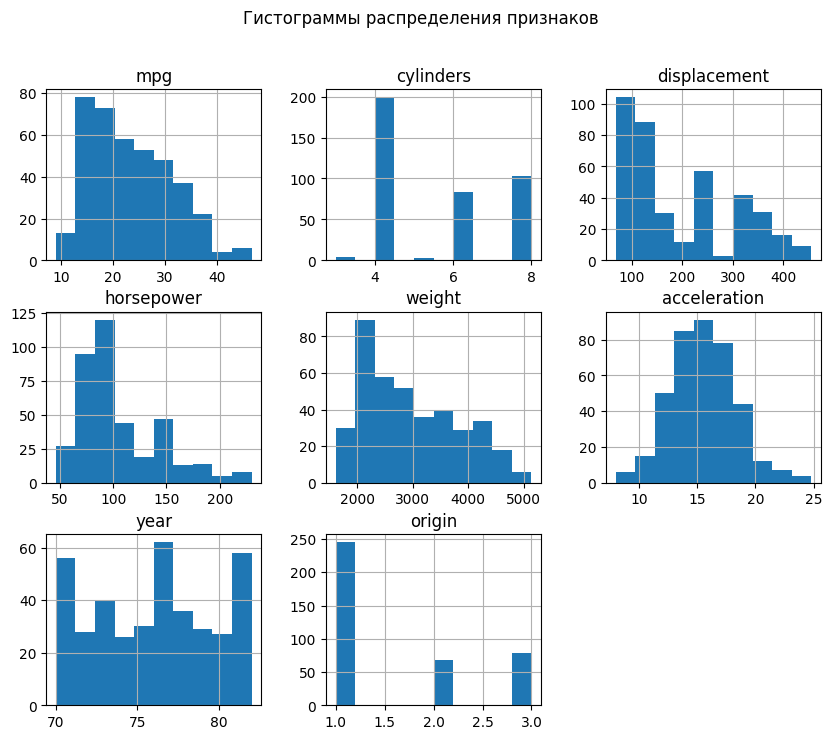

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 8))
plt.suptitle("Гистограммы распределения признаков")
plt.show()

In [ ]:
Выводы:
- mpg: малое количество автомобилей с очень низким и очень высоким расходом топлива
больше всего автомобилей с экономичным расходом топлива (~ 14-30 mpg)

- cylinders
дискретное распределение (прерывистое)
больше распространены автомобили с 4, 6 и 8 цилиндрами
меньше всего машин с 3 и 5 цилиндрами

displacement
больше всего автомобилей с объемом двигателя менее 200
eсть небольшое количество машин с очень большими объемами двигателя (>350)

horsepower
2 основные группы: автомобили с мощностью около 100 л.с. и с мощностью 150-200 л.с.
oчень мало машин с мощностью выше 200 л.с.

weight
пик приходится на автомобили весом 2000–3500
автомобили весом более 4500 встречаются редко

acceleration
единственное нормальное pаспределение, центр в значении ~ 15
характерная особенность норм.р. - минимальные значения по бокам

уear
распределение по годам похоже на равномерное

оrigin
категориальные признаки: 1, 2 и 3
большинство автомобилей имеют значение 1
меньше всего автомобилей с 2

SyntaxError: invalid character '–' (U+2013) (<ipython-input-3-84e47212d956>, line 19)

In [ ]:
data.dtypes # выводим типы признаков

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,int64
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [ ]:
data = data.drop(columns=['name']) # удалим нечисловой столбец

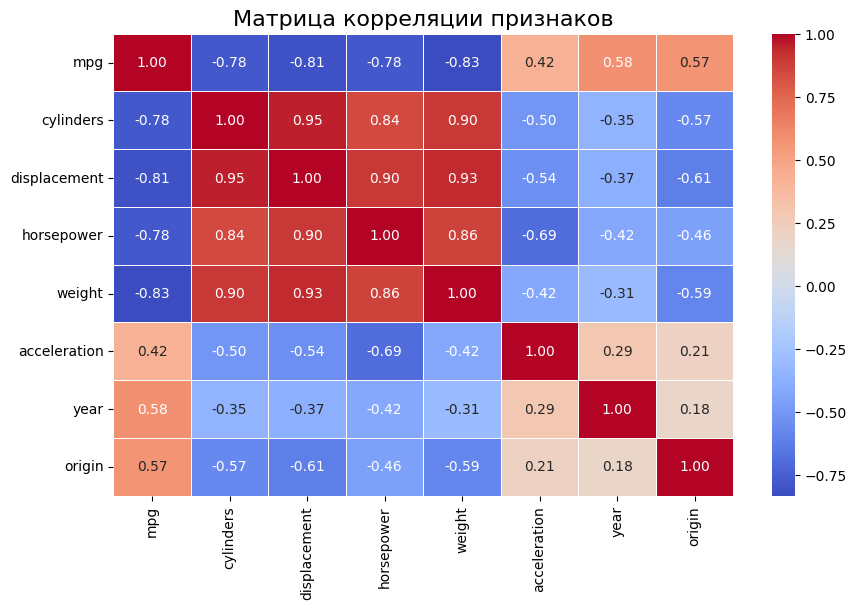

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

In [ ]:
основные выводы:

можно заметить, что сильно положительные связи находятся в квадрате, по вертикали и горизонтали от cylinders до weight
сильная отрицательная корреляция наблюдается у признака mpg с cylinders, displacement, horsepower и weight, с acceleration, годом и origin - средняя корреляция
в квадрате признаков по вертикали и горизонтали между acceleration и origin средняя отрицательная корреляция

### Задание 2.

Работа с JSON-файлом Загрузите данные из ******.json.
- Проанализируйте данные и выведите первые 10 строк.
- Постройте box plot для признака, содержащего выбросы.
- Найдите аномалии в данных и удалите их.

In [ ]:
df = pd.read_json("College.json")
df.head(10)

,Column1,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [ ]:
# этот json файл содержит информацию о колледжах, где скорее всего в итоге складывается рейтинг для каждого колледжа

In [ ]:
df.dtypes

,0
Column1,object
Private,object
Apps,int64
Accept,int64
Enroll,int64
Top10perc,int64
Top25perc,int64
F.Undergrad,int64
P.Undergrad,int64
Outstate,int64


In [ ]:
data = df.drop(columns=["Column1", "Private"]) # иключаем нечисловые колонки

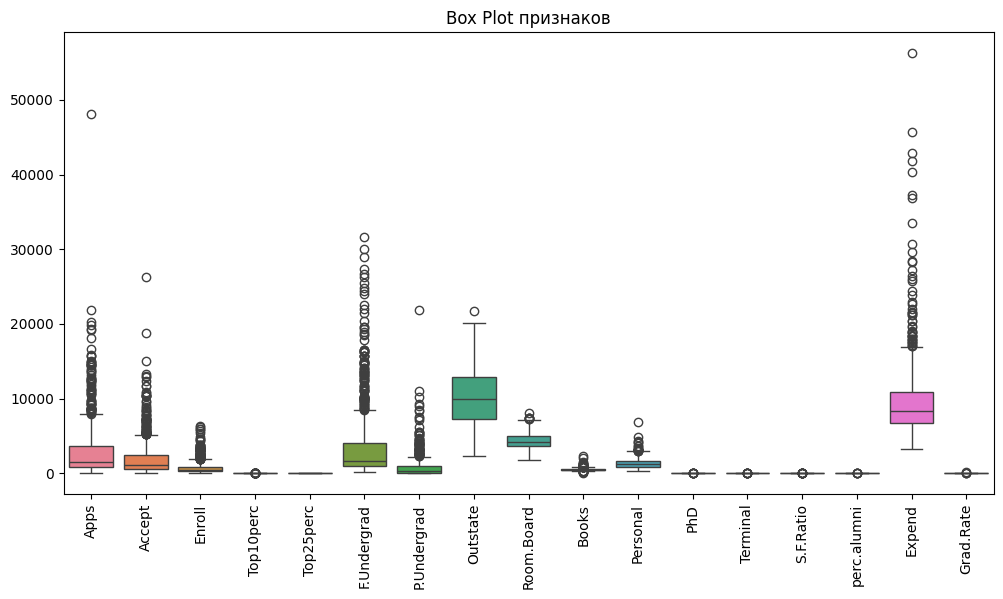

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data)  # поиск выбросов через box plot
plt.xticks(rotation=90)
plt.title("Box Plot признаков")
plt.show()

In [ ]:
# очень много выбросов у признаков apps, accept, enroll, f/p.undergrad, expend

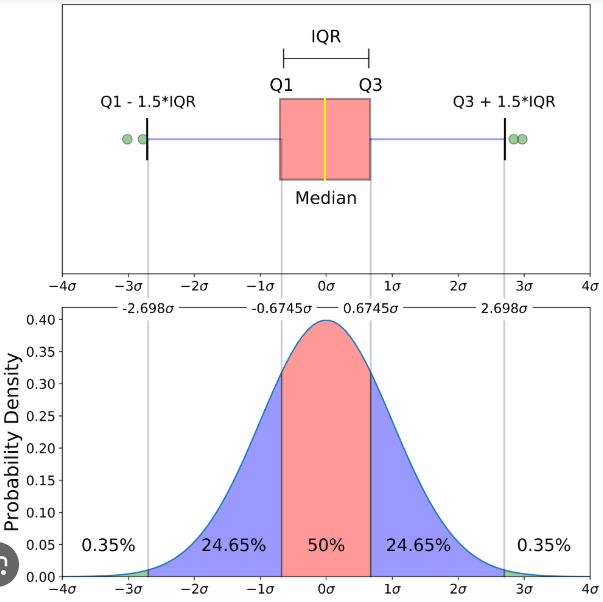

In [ ]:
def find_outliers(data, column):
# функция для поиска выбросов
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [ ]:
data.columns # выводим названия столбцов

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [ ]:
import numpy as np

outliers = {}
for col in data.columns:
    outlier_rows = find_outliers(df, col)
    if not outlier_rows.empty:
        outliers[col] = len(outlier_rows)

print("количество выбросов по признакам:")
outliers

количество выбросов по признакам:


{'Apps': 70,
 'Accept': 73,
 'Enroll': 79,
 'Top10perc': 39,
 'F.Undergrad': 97,
 'P.Undergrad': 67,
 'Outstate': 1,
 'Room.Board': 7,
 'Books': 46,
 'Personal': 20,
 'PhD': 8,
 'Terminal': 8,
 'S.F.Ratio': 12,
 'perc.alumni': 5,
 'Expend': 48,
 'Grad.Rate': 4}

In [ ]:
print("размер данных до удаления выбросов:", df.shape)

размер данных до удаления выбросов: (777, 19)


In [ ]:
for col in data.columns:        # удаляем выбросы
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("размер данных после удаления выбросов:", df.shape)

размер данных после удаления выбросов: (445, 19)


### Задание 3.
Работа с txt-файлом Загрузите данные из ******.txt.

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd

df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0)
df.head(10)

<ipython-input-22-6476ad976f8d>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0)


ParserError: Error tokenizing data. C error: Expected 15 fields in line 71, saw 16


In [ ]:
df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0, on_bad_lines='skip')

df.head(10)

<ipython-input-23-d70acf73e3ad>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0, on_bad_lines='skip')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


- Откройте файл и выведите первые 10 строк.
- В импортированных данных найдите максимальное, минимальное, среднее значения в
числовых столбцах. Визуализируйте это с помощью box plot для произвольного столбца.
Сопоставьте результаты.

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.00000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620425,11.361386,11.146812,0.069307,0.554984,6.285426,68.645347,3.78969,9.560396,408.362376,18.454653,356.594376,12.660713,22.536040
std,8.608672,23.345524,6.863438,0.254227,0.115811,0.703088,28.132090,2.10435,8.712380,168.680669,2.167002,91.367787,7.146067,9.205936
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.12960,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.887000,45.100000,2.10000,4.000000,279.000000,17.400000,375.330000,6.930000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.19920,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.11800,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.12650,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.describe().loc[['min', 'max', 'mean']]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.12960,1.000000,187.000000,12.600000,0.320000,1.730000,5.00000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.12650,24.000000,711.000000,22.000000,396.900000,37.970000,50.00000
mean,3.620425,11.361386,11.146812,0.069307,0.554984,6.285426,68.645347,3.78969,9.560396,408.362376,18.454653,356.594376,12.660713,22.53604


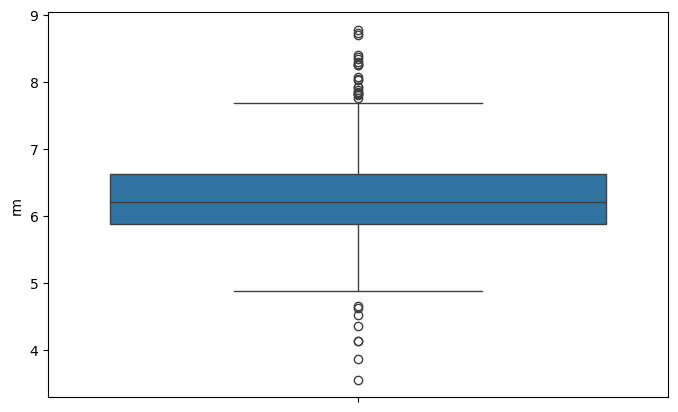

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y = df['rm'])
plt.show()


- Постройте матрицу корреляции признаков.
- Постройте диаграмму рассеяния (для признаков, имеющих высокие коэффициенты
корреляции с MEDV).

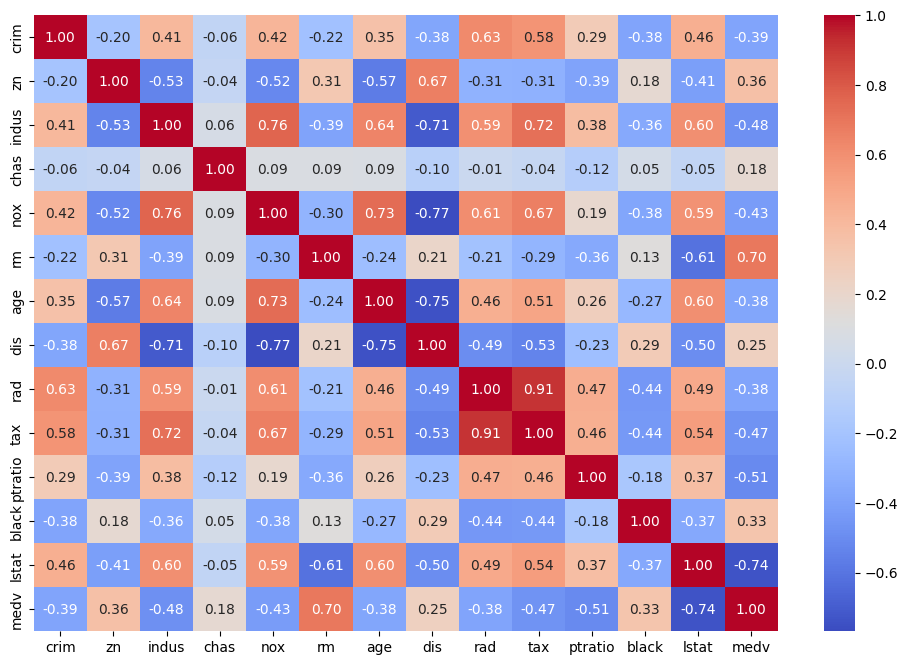

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
correlation = df.corr()["medv"].abs().sort_values(ascending=False)
high_corr_features = correlation[correlation > 0.8].index.drop("medv")
high_corr_features

Index([], dtype='object')

In [ ]:
# medv (последняя строчка) - сильной корреляции(>0.8) ни с чем нет, высокой корреляцией будем считать значения > 0.5 по модулю

In [ ]:
correlation = df.corr()["medv"].abs().sort_values(ascending=False)
high_corr_features = correlation[correlation > 0.5].index.drop("medv")
high_corr_features

Index(['lstat', 'rm', 'ptratio'], dtype='object')

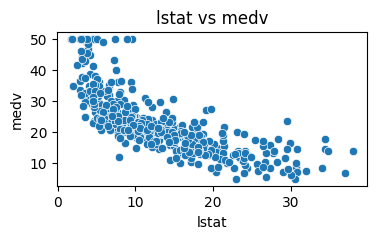

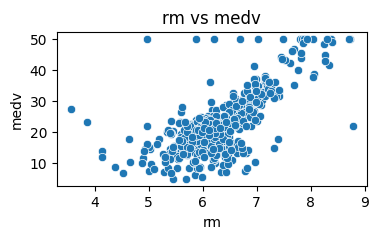

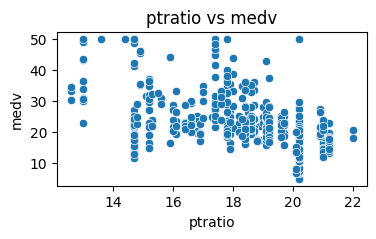

In [ ]:
for feature in high_corr_features:
    plt.figure(figsize=(4, 2))
    sns.scatterplot(x=df[feature], y=df["medv"])
    plt.xlabel(feature)
    plt.ylabel("medv")
    plt.title(f"{feature} vs medv")
    plt.show()

In [ ]:
# rm - среднее кол-во комнат
# lstat - % бедного населения
# ptratio - отношение кол-ва учеников и учителей

# MEDV - Медианная стоимость домов, занимаемых владельцами, в 1000 долл. США

In [ ]:
# вывод

# график istat vs medv - отрицательная линейная зависимость, если чуть подчистить выбросы -> чем меньше "бедняков" в округе, тем дороже дома
# rm vs medv - положительная линейная зависимость, если чуть подчистить выбросы -> чем больше комнат, тем дороже дом
# ptratio vs medv - нет четкой линейной зависимости, только если столбчато - отношение кол-ва учеников и учителей не сильно влияет на стоимость

### Задание 4.

Получение данных из API Выберите открытый API (https://open-meteo.com/ для
доступа к информации с погодой). Используйте библиотеку requests для получения
данных. Преобразуйте полученные данные в удобную таблицу (pandas DataFrame).
- Постройте временной ряд изменения значений.
- Автоматизируйте процесс: напишите функцию, которая запрашивает данные каждые 30
минут и строит обновляемый график.
- Сравните данные за разные временные промежутки.
- Измените координаты, чтобы получить данные о погоде в другом городе.
- Добавьте получение минимальной температуры (temperature_2m_min) и постройте две
линии на графике.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

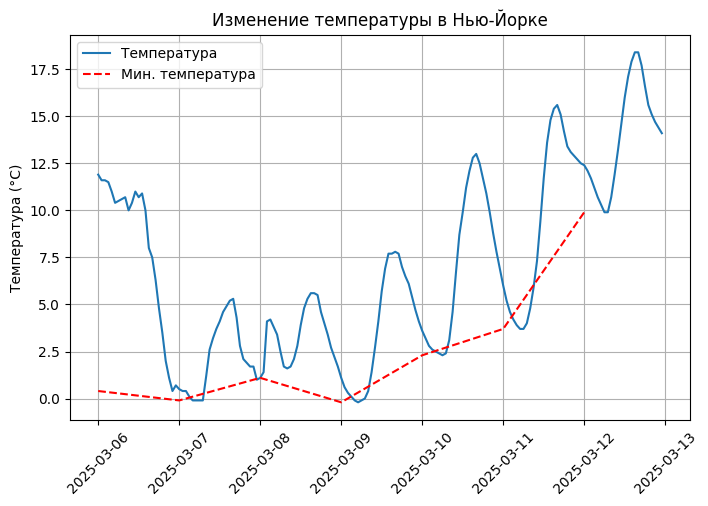

In [ ]:
latitude, longitude = 40.7128, -74.0060 # координаты Нью-Йорка

url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": ["temperature_2m"],
    "daily": ["temperature_2m_min"],
    "timezone": "auto"
}
response = requests.get(url, params=params) # запрашиваем данные
data = response.json()

# получение данных - по часам и дням
hourly_data = data["hourly"]
daily_data = data["daily"]

df_hourly = pd.DataFrame({
    "datetime": pd.to_datetime(hourly_data["time"]),     # почасовой прогноз - время и температура на высоте 2м
    "temperature_2m": hourly_data["temperature_2m"]
})

df_daily = pd.DataFrame({
    "date": pd.to_datetime(daily_data["time"]).date,     # ежедневный прогноз - время и min температура на высоте 2м
    "temperature_2m_min": daily_data["temperature_2m_min"] # Добавьте получение минимальной температуры (temperature_2m_min)
})

plt.figure(figsize=(8, 5))
plt.plot(df_hourly["datetime"], df_hourly["temperature_2m"], label="Температура")
plt.plot(df_daily["date"], df_daily["temperature_2m_min"], label="Мин. температура", linestyle='dashed', color='red')
plt.ylabel("Температура (°C)")
plt.title("Изменение температуры в Нью-Йорке")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# cравниваем данные за разные временные промежутки
print("\nСредняя температура за сутки в Нью-Йорке:")
print(df_hourly.resample('D', on='datetime').mean())


Средняя температура за сутки в Нью-Йорке:
            temperature_2m
datetime                  
2025-03-06        8.212500
2025-03-07        2.137500
2025-03-08        3.320833
2025-03-09        3.650000
2025-03-10        7.183333
2025-03-11        9.487500
2025-03-12       13.941667


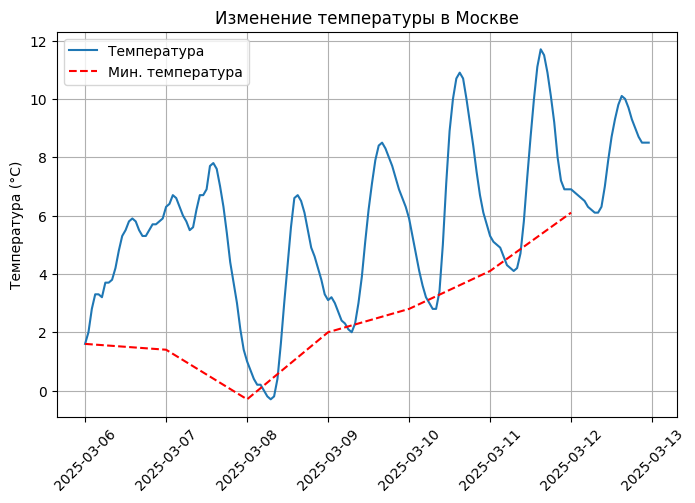


Средняя температура за сутки в Москве:
            temperature_2m
datetime                  
2025-03-06        4.558333
2025-03-07        5.754167
2025-03-08        2.870833
2025-03-09        5.179167
2025-03-10        6.487500
2025-03-11        7.154167
2025-03-12        7.895833


In [ ]:
# Измените координаты, чтобы получить данные о погоде в другом городе.

latitude, longitude = 55.7558, 37.6173 # координаты Москвы

url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": ["temperature_2m"],
    "daily": ["temperature_2m_min"],
    "timezone": "auto"
}
response = requests.get(url, params=params) # запрашиваем данные
data = response.json()

# получение данных - по часам и дням
hourly_data = data["hourly"]
daily_data = data["daily"]

df_hourly = pd.DataFrame({
    "datetime": pd.to_datetime(hourly_data["time"]),     # почасовой прогноз - время и температура на высоте 2м
    "temperature_2m": hourly_data["temperature_2m"]
})

df_daily = pd.DataFrame({
    "date": pd.to_datetime(daily_data["time"]).date,     # ежедневный прогноз - время и min температура на высоте 2м
    "temperature_2m_min": daily_data["temperature_2m_min"] # Добавьте получение минимальной температуры (temperature_2m_min)
})

plt.figure(figsize=(8, 5))
plt.plot(df_hourly["datetime"], df_hourly["temperature_2m"], label="Температура")
plt.plot(df_daily["date"], df_daily["temperature_2m_min"], label="Мин. температура", linestyle='dashed', color='red')
plt.ylabel("Температура (°C)")
plt.title("Изменение температуры в Москве")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# cравниваем данные за разные временные промежутки
print("\nСредняя температура за сутки в Москве:")
print(df_hourly.resample('D', on='datetime').mean())

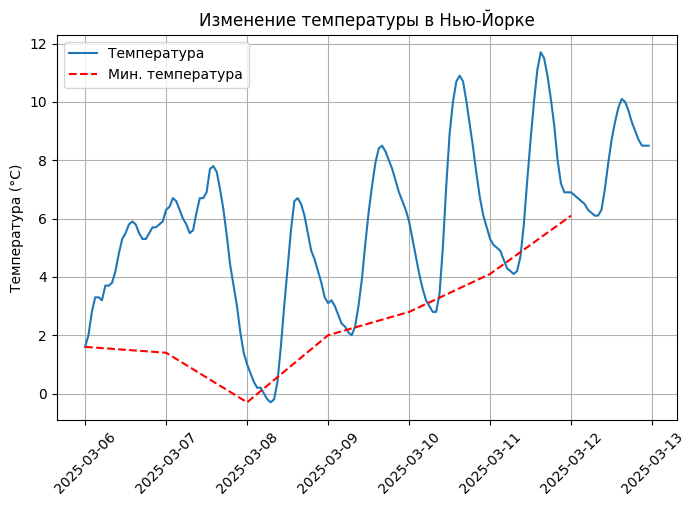

Обновлено: 2025-03-06 09:31:50.145731 - Следующее обновление через 30.0 минут


KeyboardInterrupt: 

In [ ]:
# запрашивает данные каждые 30 минут и строит обновляемый график:
interval = 1800
while True:
    response = requests.get(url, params=params)
    data = response.json()
    hourly_data = data["hourly"]
    daily_data = data["daily"]
    df_hourly = pd.DataFrame({
        "datetime": pd.to_datetime(hourly_data["time"]),
        "temperature_2m": hourly_data["temperature_2m"]
    })
    df_daily = pd.DataFrame({
        "date": pd.to_datetime(daily_data["time"]).date,
        "temperature_2m_min": daily_data["temperature_2m_min"]
    })
    plt.figure(figsize=(8, 5))
    plt.plot(df_hourly["datetime"], df_hourly["temperature_2m"], label="Температура")
    plt.plot(df_daily["date"], df_daily["temperature_2m_min"], label="Мин. температура", linestyle='dashed', color='red')
    plt.ylabel("Температура (°C)")
    plt.title("Изменение температуры в Нью-Йорке")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    print(f"Обновлено: {datetime.now()} - Следующее обновление через {interval / 60} минут")
    time.sleep(interval)

### Задание 5*. Работа с базами данных (SQLite)
- Создайте базу данных sales.db, содержащую таблицу transactions с полями (id, date, category, amount).
- Наполните таблицу тестовыми данными. Используйте sqlite3 и pandas для загрузки данных в DataFrame.
- Выполните SQL-запросы: Найдите суммарные продажи по категориям. Определите самую популярную категорию. Найдите средний чек по дням недели.

In [ ]:
import sqlite3
import pandas as pd
import random
from datetime import datetime, timedelta

- Создайте базу данных sales.db, содержащую таблицу transactions с полями (id, date, category, amount).

In [ ]:
# подключаемся к базе данных (если файла нет, он создастся)
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# создаем таблицу transactions
cursor.execute('''
    CREATE TABLE IF NOT EXISTS transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        date TEXT,
        category TEXT,
        amount REAL
    )
''')

conn.commit()
print("Таблица создана")

Таблица создана



- Наполните таблицу тестовыми данными. Используйте sqlite3 и pandas для загрузки данных в DataFrame.

In [ ]:
categories = ["Electronics", "Clothing", "Food", "Entertainment", "Health"]
start_date = datetime(2024, 1, 1)
num_records = 100  # Количество транзакций

data = []
for _ in range(num_records):
    date = start_date + timedelta(days = random.randint(0, 60))      # генерируем случайные данные
    category = random.choice(categories)
    amount = round(random.uniform(5, 500), 2)
    data.append((date.strftime("%Y-%m-%d"), category, amount))

# вставим данные в таблицу
cursor.executemany("INSERT INTO transactions (date, category, amount) VALUES (?, ?, ?)", data)
conn.commit()
print("Данные добавлены")

Данные добавлены


In [ ]:
df = pd.read_sql("SELECT * FROM transactions", conn)  # посмотрим как выглядит таблица
df.head(10)

,id,date,category,amount
0,1,2024-02-15,Entertainment,299.62
1,2,2024-02-04,Health,183.09
2,3,2024-01-15,Clothing,404.41
3,4,2024-01-17,Clothing,108.79
4,5,2024-01-19,Food,425.14
5,6,2024-01-15,Electronics,460.59
6,7,2024-02-23,Entertainment,56.81
7,8,2024-02-23,Entertainment,102.83
8,9,2024-02-19,Health,230.41
9,10,2024-02-19,Entertainment,297.44



Выполните SQL-запросы:

- Найдите суммарные продажи по категориям.

In [ ]:
query = '''SELECT category, SUM(amount) AS total_sales
          FROM transactions
          GROUP BY category
          ORDER BY total_sales DESC'''

df_sales = pd.read_sql(query, conn)
df_sales

,category,total_sales
0,Food,8291.73
1,Clothing,5745.53
2,Electronics,5134.89
3,Entertainment,3532.61
4,Health,3342.17


In [ ]:
# просуммировали продажи по категориям

- Определите самую популярную категорию.

In [ ]:
query = '''SELECT category, COUNT(*) AS transaction_count
          FROM transactions
          GROUP BY category
          ORDER BY transaction_count DESC LIMIT 1'''

df_popular = pd.read_sql(query, conn)
df_popular

,category,transaction_count
0,Food,29


In [ ]:
# самая популярная категория - еда, т.к. было больше всего транзакций

- Найдите средний чек по дням недели.

In [ ]:
query = '''
    SELECT
        strftime('%w', date) AS weekday,
        AVG(amount) AS avg_amount
    FROM transactions
    GROUP BY weekday
    ORDER BY weekday
'''

df_avg_check = pd.read_sql(query, conn)

df_avg_check["weekday"] = df_avg_check["weekday"].replace({
    "0": "Воскресенье", "1": "Понедельник", "2": "Вторник",
    "3": "Среда", "4": "Четверг", "5": "Пятница", "6": "Суббота"
})

df_avg_check

,weekday,avg_amount
0,Воскресенье,308.711538
1,Понедельник,279.267647
2,Вторник,312.895333
3,Среда,247.071875
4,Четверг,222.068824
5,Пятница,235.745000
6,Суббота,155.242500


In [ ]:
# получили дни недели из столбца, сгруппировали продажи и посчитали среднее для каждого дня